In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def euler_ode(time, initial_condition, derivative_function):
    """
    Solves an ordinary differential equation using Euler's method.

    Args:
        time (np.ndarray): Array of time points.
        initial_condition (float): Initial value of the variable.
        derivative_function (callable): Function that computes the derivative.
                                         It should take the current value and
                                         return the derivative at that time.

    Returns:
        np.ndarray: Array of the variable's values at each time point.
    """
    dt = time[1] - time[0]
    num_steps = len(time)
    solution = np.zeros(num_steps)
    solution[0] = initial_condition
    for i in range(num_steps - 1):
        solution[i + 1] = solution[i] + dt * derivative_function(solution[i])
    return solution


In [3]:
def theta_model(theta, I):
    """
    Computes the right-hand side of the theta model ODE.

    Args:
        theta (float): The current phase of the oscillator.
        I (float): The input current.

    Returns:
        float: The derivative d(theta)/dt.
    """
    d_theta_dt = (1 - np.cos(theta)) + (1 + np.cos(theta)) * I
    return d_theta_dt

if __name__ == "__main__":
    # Define time parameters
    t_start = 0
    t_end = 20
    dt = 0.01
    time = np.arange(t_start, t_end, dt)

    # Initial condition
    theta_0 = 0.1

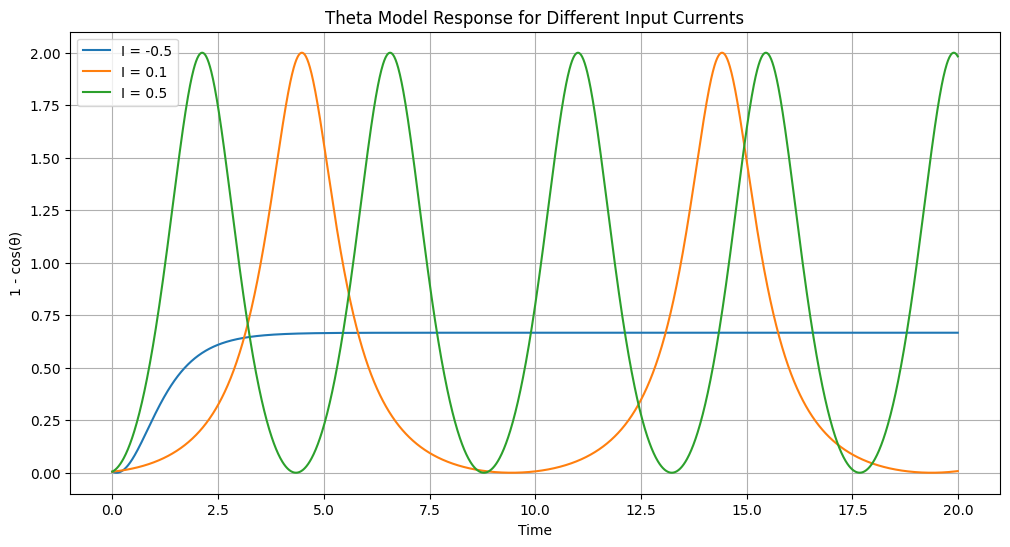


Observations for different input currents:
- For I = -0.5, the value of 1 - cos(θ) approaches a steady state. No oscillations are observed.
- For I = 0.1, oscillations are observed.
- For I = 0.5, oscillations are observed, and the frequency appears higher than for I = 0.1.

Condition for oscillations: Based on these simulations, a positive input current (I > 0) seems to be a condition for observing sustained oscillations.
Dependence of frequency on input current: The frequency of oscillations appears to increase with the input current I.


In [4]:
    input_currents = [-0.5, 0.1, 0.5]
    plt.figure(figsize=(12, 6))
    for I in input_currents:
        theta = euler_ode(time, theta_0, lambda theta: theta_model(theta, I))
        transformation = 1 - np.cos(theta)
        plt.plot(time, transformation, label=f'I = {I}')
    plt.xlabel('Time')
    plt.ylabel('1 - cos(θ)')
    plt.title('Theta Model Response for Different Input Currents')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\nObservations for different input currents:")
    print("- For I = -0.5, the value of 1 - cos(θ) approaches a steady state. No oscillations are observed.")
    print("- For I = 0.1, oscillations are observed.")
    print("- For I = 0.5, oscillations are observed, and the frequency appears higher than for I = 0.1.")
    print("\nCondition for oscillations: Based on these simulations, a positive input current (I > 0) seems to be a condition for observing sustained oscillations.")
    print("Dependence of frequency on input current: The frequency of oscillations appears to increase with the input current I.")

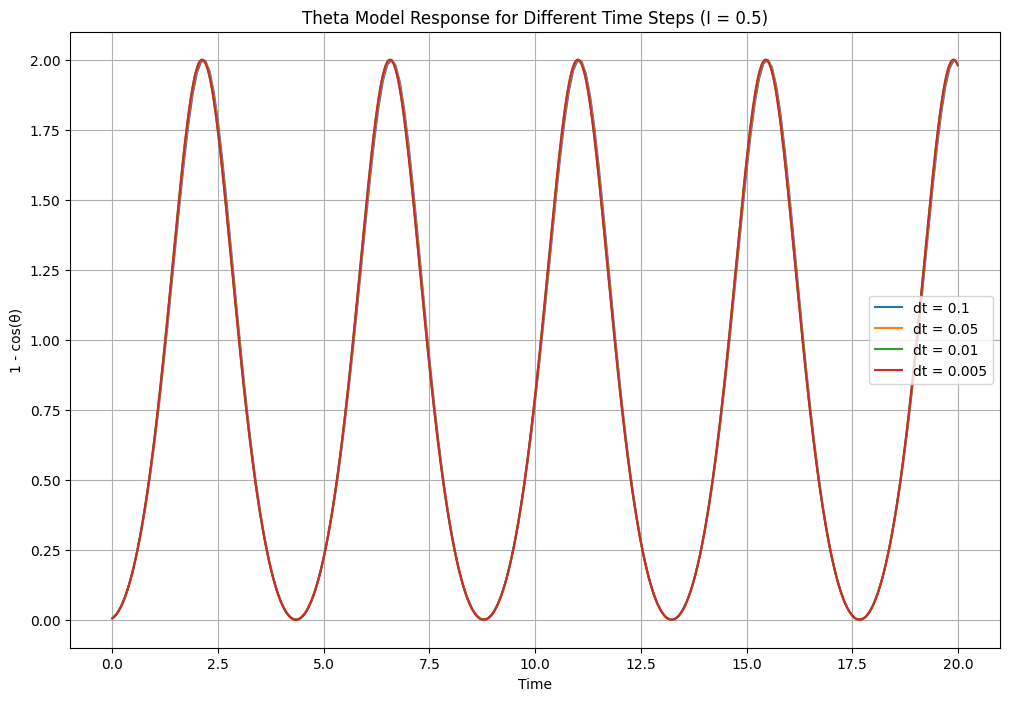


Observations for different time steps:
- As the time step (dt) decreases, the numerical solution generally becomes more accurate, providing a smoother and more precise representation of the oscillator's dynamics.
- Smaller time steps increase the computational time because more iterations are required to simulate the same duration.
- Larger time steps can lead to less accurate solutions and may even introduce numerical artifacts.


In [5]:
    # 3. Observe what happens as the time step is varied
    time_steps = [0.1, 0.05, 0.01, 0.005]
    plt.figure(figsize=(12, 8))
    for dt in time_steps:
        time_coarse = np.arange(t_start, t_end, dt)
        theta_coarse = euler_ode(time_coarse, theta_0, lambda theta: theta_model(theta, 0.5))
        transformation_coarse = 1 - np.cos(theta_coarse)
        plt.plot(time_coarse, transformation_coarse, label=f'dt = {dt}')
    plt.xlabel('Time')
    plt.ylabel('1 - cos(θ)')
    plt.title('Theta Model Response for Different Time Steps (I = 0.5)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\nObservations for different time steps:")
    print("- As the time step (dt) decreases, the numerical solution generally becomes more accurate, providing a smoother and more precise representation of the oscillator's dynamics.")
    print("- Smaller time steps increase the computational time because more iterations are required to simulate the same duration.")
    print("- Larger time steps can lead to less accurate solutions and may even introduce numerical artifacts.")


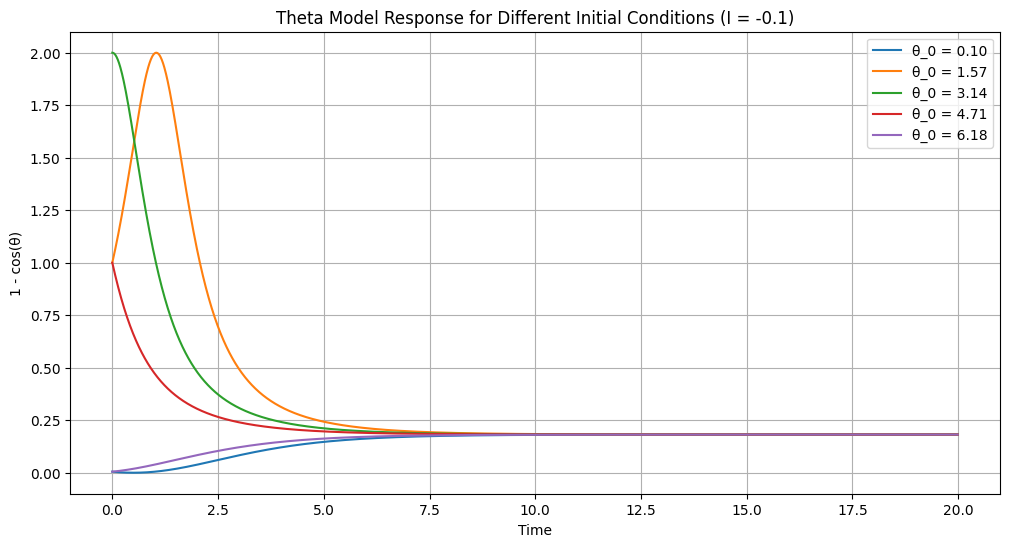


Observations for different initial conditions with negative input current (I = -0.1):
- For a negative input current, the system typically evolves towards a stable fixed point. The specific fixed point reached depends on the initial condition.
- We observe that regardless of the initial condition, the value of 1 - cos(θ) converges to a specific value (close to 1 in this case). This indicates that θ itself is converging to a stable fixed point (θ = 0 or θ = 2π).
- This happens because for I < 0, the term (1 + cos(θ)) * I is negative. The dynamics tend to push θ towards values where cos(θ) is close to 1 (i.e., θ ≈ 0 or multiples of 2π), making dθ/dt approach 0.


In [6]:
    # 4. For negative input current (e.g., I = -0.1), assess the role of the initial condition
    I_negative = -0.1
    initial_conditions = [0.1, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi - 0.1]
    plt.figure(figsize=(12, 6))
    for theta_0 in initial_conditions:
        theta = euler_ode(time, theta_0, lambda theta: theta_model(theta, I_negative))
        transformation = 1 - np.cos(theta)
        plt.plot(time, transformation, label=f'θ_0 = {theta_0:.2f}')
    plt.xlabel('Time')
    plt.ylabel('1 - cos(θ)')
    plt.title(f'Theta Model Response for Different Initial Conditions (I = {I_negative})')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\nObservations for different initial conditions with negative input current (I = -0.1):")
    print("- For a negative input current, the system typically evolves towards a stable fixed point. The specific fixed point reached depends on the initial condition.")
    print("- We observe that regardless of the initial condition, the value of 1 - cos(θ) converges to a specific value (close to 1 in this case). This indicates that θ itself is converging to a stable fixed point (θ = 0 or θ = 2π).")
    print("- This happens because for I < 0, the term (1 + cos(θ)) * I is negative. The dynamics tend to push θ towards values where cos(θ) is close to 1 (i.e., θ ≈ 0 or multiples of 2π), making dθ/dt approach 0.")